In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [10,5]
#ignore warnings

import warnings
#set the warning filter to ignore future warnings
warnings.simplefilter(action = 'ignore' , category = FutureWarning)

In [2]:
full_data = pd.read_csv("/content/canada_per_capita_income.csv")

In [3]:
full_data.shape

(47, 2)

In [4]:
full_data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [5]:
full_data.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [6]:
full_data.columns

Index(['year', 'per capita income (US$)'], dtype='object')

#Data Visualization

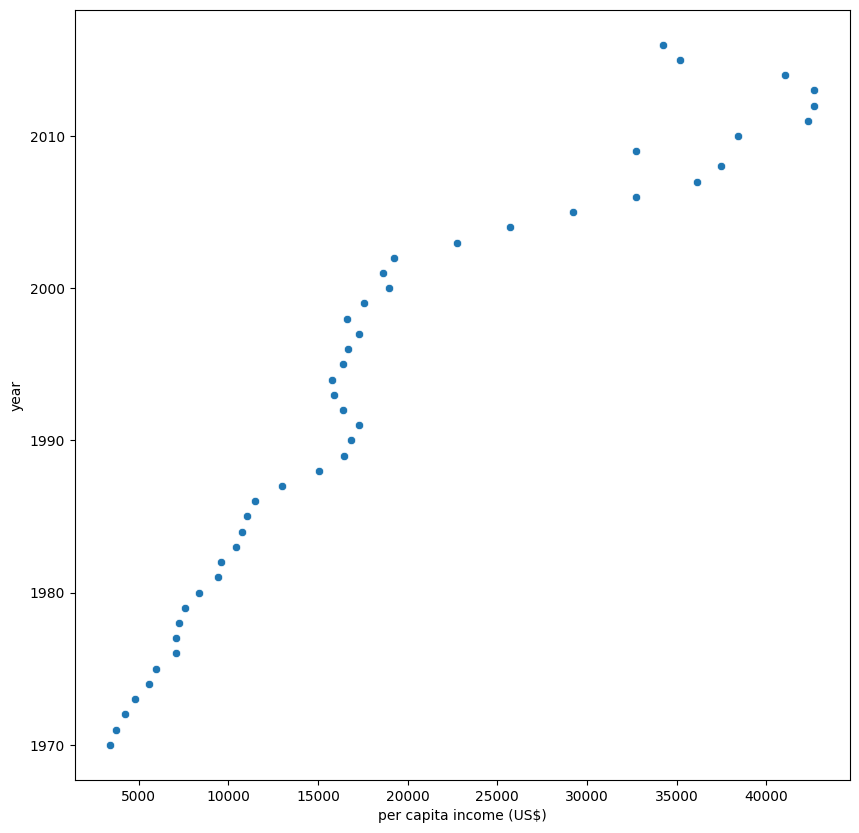

In [7]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = "per capita income (US$)" , y = "year" , data = full_data)
plt.show()

#Histogram

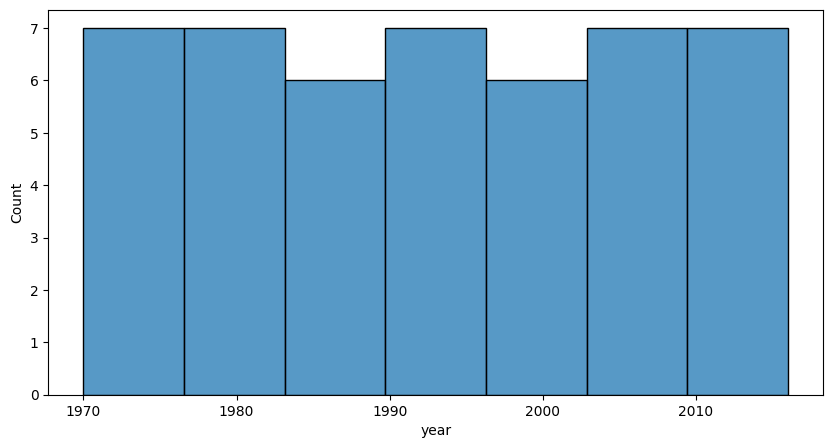

In [8]:
sns.histplot(full_data["year"] , kde = False)
plt.show()

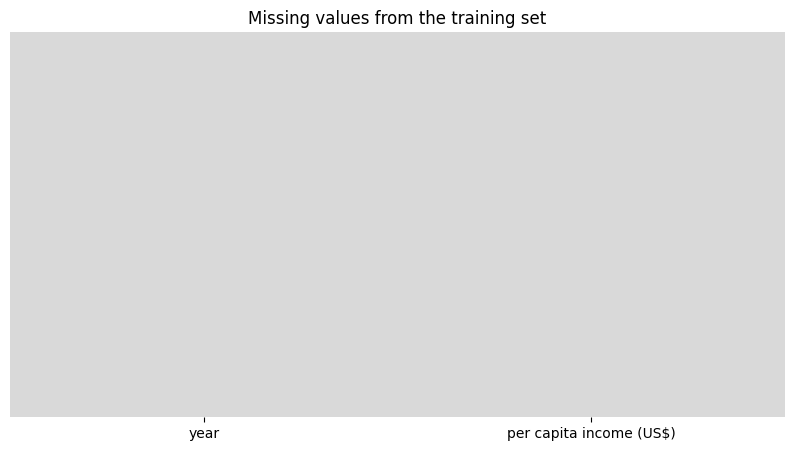

In [9]:
#Heatmap
sns.heatmap(full_data.isnull() , yticklabels = False , cbar = False , cmap = 'tab20c_r')
plt.title("Missing values from the training set")
plt.show()

#**Objective 2 : Machine learning**

In [10]:
#split data to be used in the models
x = full_data.drop("per capita income (US$)",axis = 1)#grabs everything but price

#Target variable
y = full_data["per capita income (US$)"]# y is the column we are trying to predict

In [11]:
x

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [12]:
y

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance and fit it to your data
pre_process = StandardScaler()
pre_process.fit(x)

# Transform your data using the pre-fit scaler
x_scaled = pre_process.transform(x)

In [14]:
#y contains target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

In [15]:
x_scaled

array([[-1.6955825 ],
       [-1.62186152],
       [-1.54814054],
       [-1.47441956],
       [-1.40069858],
       [-1.32697761],
       [-1.25325663],
       [-1.17953565],
       [-1.10581467],
       [-1.03209369],
       [-0.95837272],
       [-0.88465174],
       [-0.81093076],
       [-0.73720978],
       [-0.6634888 ],
       [-0.58976782],
       [-0.51604685],
       [-0.44232587],
       [-0.36860489],
       [-0.29488391],
       [-0.22116293],
       [-0.14744196],
       [-0.07372098],
       [ 0.        ],
       [ 0.07372098],
       [ 0.14744196],
       [ 0.22116293],
       [ 0.29488391],
       [ 0.36860489],
       [ 0.44232587],
       [ 0.51604685],
       [ 0.58976782],
       [ 0.6634888 ],
       [ 0.73720978],
       [ 0.81093076],
       [ 0.88465174],
       [ 0.95837272],
       [ 1.03209369],
       [ 1.10581467],
       [ 1.17953565],
       [ 1.25325663],
       [ 1.32697761],
       [ 1.40069858],
       [ 1.47441956],
       [ 1.54814054],
       [ 1

In [16]:
y_scaled

array([[-1.30361891],
       [-1.27262613],
       [-1.23206851],
       [-1.18559702],
       [-1.12075125],
       [-1.08533792],
       [-0.99597203],
       [-0.99278079],
       [-0.98036341],
       [-0.95055098],
       [-0.8873007 ],
       [-0.79672234],
       [-0.7811799 ],
       [-0.7142304 ],
       [-0.68283503],
       [-0.66363229],
       [-0.62466562],
       [-0.49935739],
       [-0.32251518],
       [-0.20942545],
       [-0.17482533],
       [-0.1389253 ],
       [-0.21065529],
       [-0.25571644],
       [-0.26577581],
       [-0.21424726],
       [-0.18648726],
       [-0.13517423],
       [-0.19296761],
       [-0.11247414],
       [ 0.00564804],
       [-0.02677145],
       [ 0.02620859],
       [ 0.32078794],
       [ 0.57105925],
       [ 0.8632581 ],
       [ 1.16060551],
       [ 1.446699  ],
       [ 1.55605638],
       [ 1.16202614],
       [ 1.63786722],
       [ 1.96662588],
       [ 1.99438884],
       [ 1.99533059],
       [ 1.85787217],
       [ 1

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(x_scaled ,y_scaled, test_size = 0.20 , random_state = 101)

In [18]:
x_train.shape

(37, 1)

In [19]:
x_test.shape

(10, 1)

In [20]:
y_train.shape

(37, 1)

In [21]:
y_test.shape

(10, 1)

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [23]:
x_test

array([[ 0.88465174],
       [-0.22116293],
       [ 1.40069858],
       [ 0.51604685],
       [ 1.54814054],
       [-1.62186152],
       [ 1.47441956],
       [-0.07372098],
       [-0.51604685],
       [ 1.17953565]])

In [24]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred)

[[ 0.73922702]
 [-0.23746719]
 [ 1.19501765]
 [ 0.41366228]
 [ 1.32524354]
 [-1.47461318]
 [ 1.26013059]
 [-0.10724129]
 [-0.49791897]
 [ 0.9996788 ]]


In [25]:
# Score It
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Model Rankings (lower values are better):")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Model Rankings (lower values are better):
Mean Squared Error: 0.17429045170285656
Root Mean Squared Error: 0.41748107945493357


In [32]:
lin_reg.predict([[2016]])

array([[1780.55959997]])

In [34]:
lin_reg.coef_

array([[0.88323498]])

In [35]:
lin_reg.intercept_

array([-0.04212835])

In [37]:
2016*0.88323498-0.04212835

1780.55959133